In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Sales = pd.read_csv('Walmart_Sales.csv')

In [3]:
Sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
Sales['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [5]:
Sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [94]:
Sales.describe()
# -- use standard scaler here

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(6):
    vif.append(variance_inflation_factor(Sales.iloc[:,2:8], i))

In [93]:
pd.DataFrame({'vif': vif}, index=Sales.columns[2:8]).T

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
vif,4.248348,1.102846,13.361596,27.738755,14.815981,14.978871


# Outlier Test

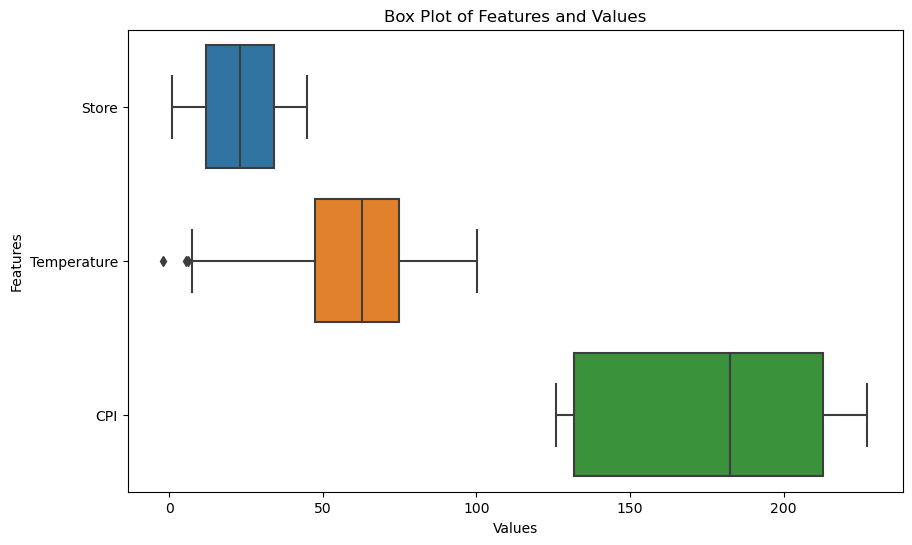

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Sales[['Store','Temperature','CPI']], orient='h')
plt.title('Box Plot of Features and Values')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

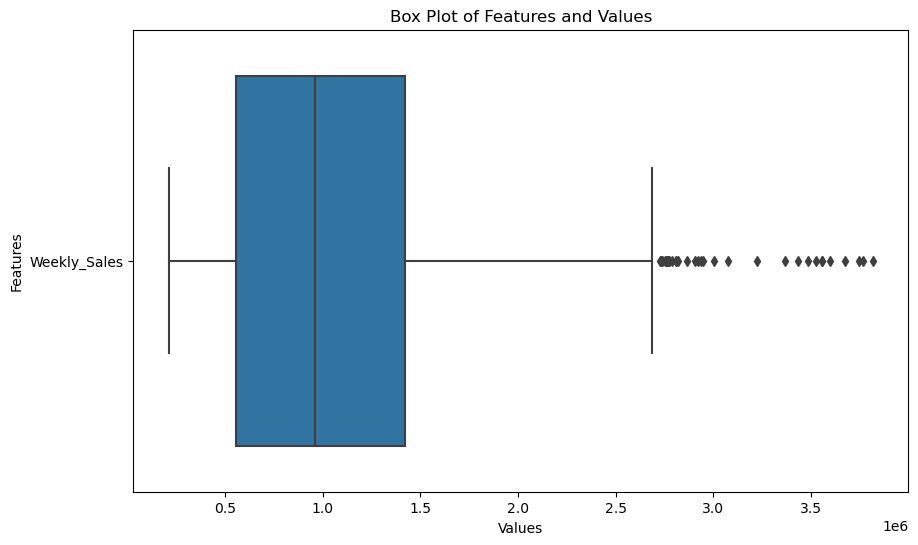

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Sales[['Weekly_Sales']], orient='h')
plt.title('Box Plot of Features and Values')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

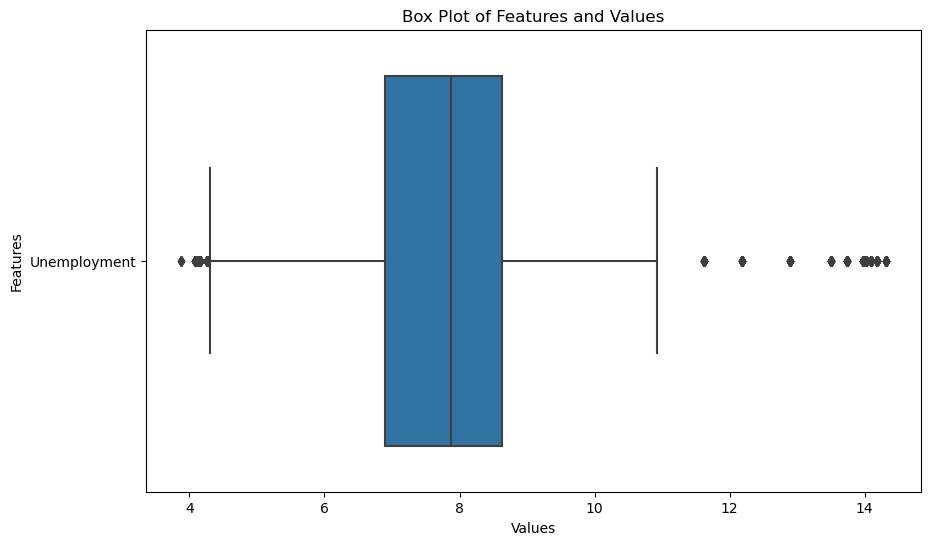

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Sales[['Unemployment']], orient='h')
plt.title('Box Plot of Features and Values')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

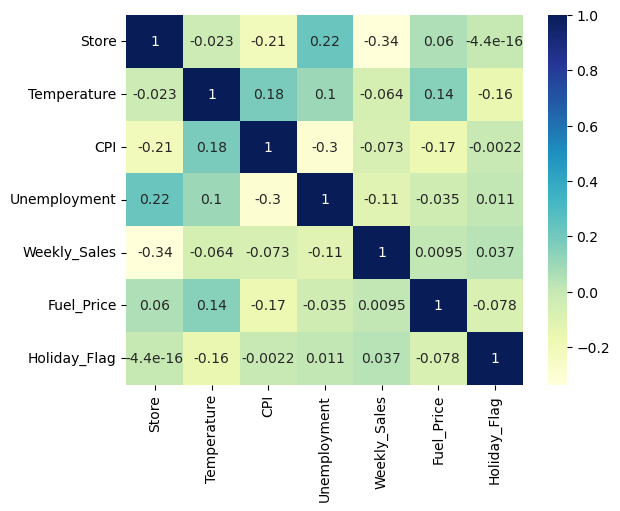

In [11]:
sns.heatmap( Sales[['Store','Temperature','CPI','Unemployment','Weekly_Sales','Fuel_Price','Holiday_Flag']].corr(), cmap = 'YlGnBu', annot = True )
plt.show()

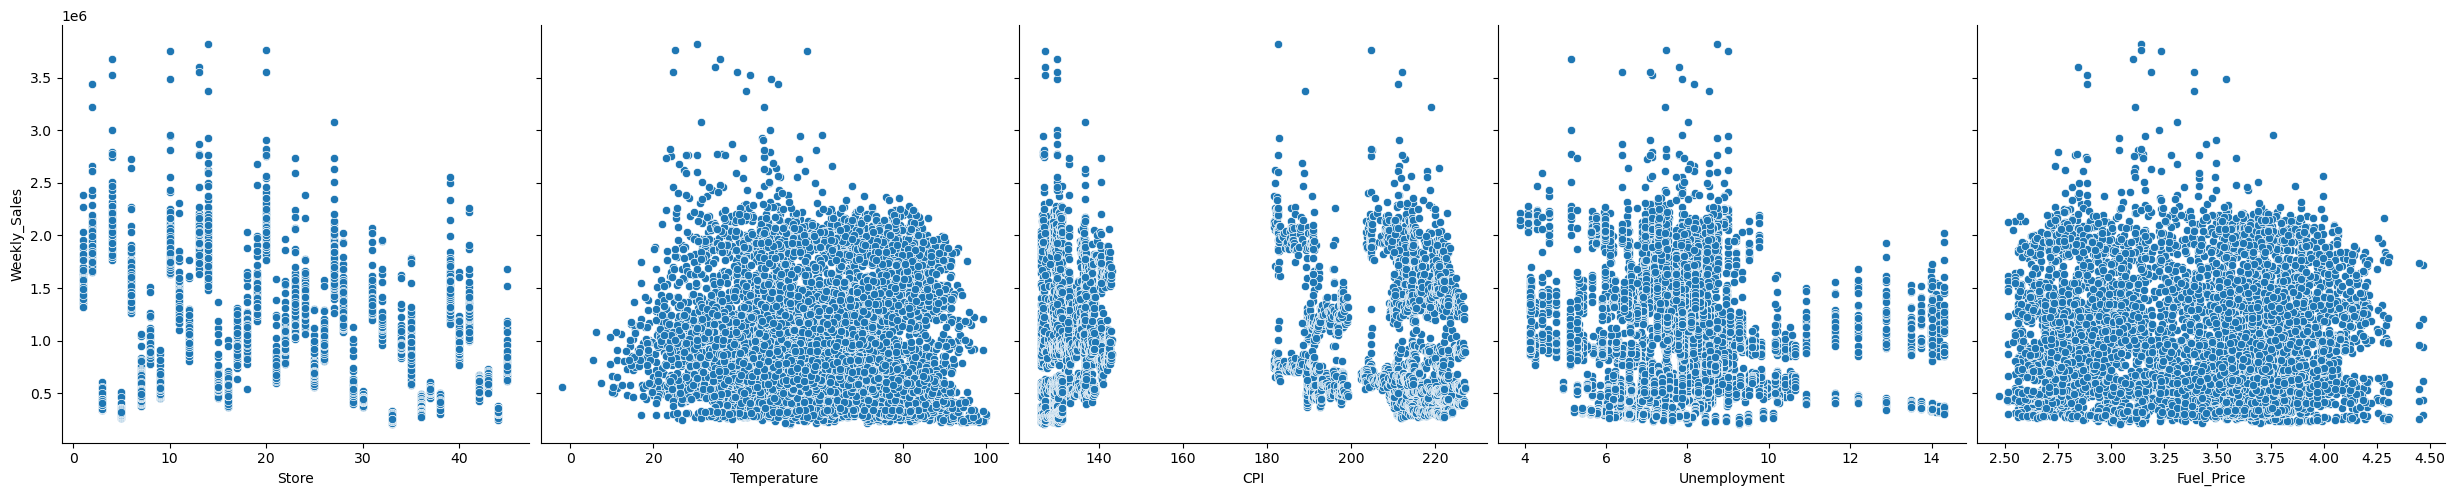

In [12]:
sns.pairplot(Sales, x_vars=[ 'Store','Temperature','CPI','Unemployment','Fuel_Price'], y_vars = 'Weekly_Sales', size = 5, kind = 'scatter' )
plt.show()

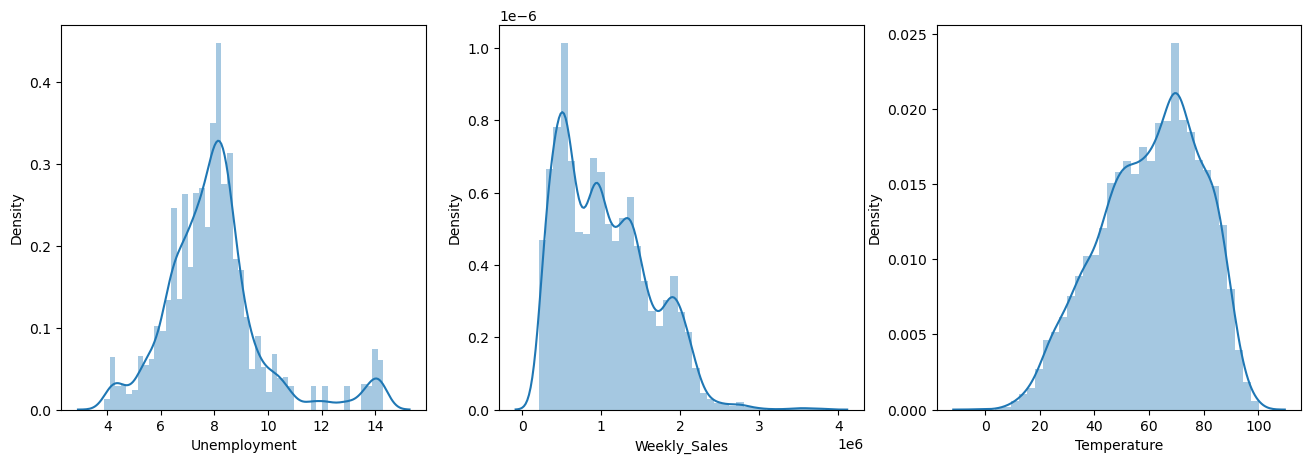

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(Sales['Unemployment'])

plt.subplot(1,3,2)
sns.distplot(Sales['Weekly_Sales'])

plt.subplot(1,3,3)
sns.distplot(Sales['Temperature'])

plt.show()

In [14]:
Sales[['Unemployment','Weekly_Sales','Temperature']].skew()

Unemployment    1.188144
Weekly_Sales    0.668362
Temperature    -0.336768
dtype: float64

# IQR Calculation

In [15]:
Per25 = Sales['Unemployment'].quantile(0.25)
Per75 = Sales['Unemployment'].quantile(0.75)


In [16]:
iqr = Per75 - Per25
iqr

1.7309999999999999

In [17]:
upper_limit = Per75 + 1.5 * iqr
lower_limit = Per25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 11.218499999999999
Lower limit 4.2945


# Finding Outliers

In [18]:
Sales[Sales['Unemployment'] > upper_limit ]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1573,12,05-02-2010,1100046.37,0,49.47,2.962,126.442065,13.975
1574,12,12-02-2010,1117863.33,1,47.87,2.946,126.496258,13.975
1575,12,19-02-2010,1095421.65,0,54.83,2.915,126.526286,13.975
1576,12,26-02-2010,1048617.17,0,50.23,2.825,126.552286,13.975
1577,12,05-03-2010,1077018.27,0,53.77,2.987,126.578286,13.975
...,...,...,...,...,...,...,...,...
5412,38,01-06-2012,435579.70,0,78.11,4.277,130.959226,11.627
5413,38,08-06-2012,448110.25,0,84.83,4.103,130.889677,11.627
5414,38,15-06-2012,430222.07,0,85.94,4.144,130.829533,11.627
5415,38,22-06-2012,405938.35,0,91.61,4.014,130.792900,11.627


In [19]:
Sales[Sales['Unemployment'] < lower_limit ]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
555,4,06-07-2012,2224499.28,0,80.37,3.187,130.719633,4.077
556,4,13-07-2012,2100252.61,0,76.86,3.224,130.683000,4.077
557,4,20-07-2012,2175563.69,0,79.14,3.263,130.701290,4.077
558,4,27-07-2012,2048613.65,0,81.06,3.356,130.719581,4.077
559,4,03-08-2012,2174514.13,0,83.86,3.374,130.737871,4.077
...,...,...,...,...,...,...,...,...
5715,40,28-09-2012,919595.44,0,50.98,4.018,138.739500,4.156
5716,40,05-10-2012,1069112.00,0,57.21,4.027,138.825600,4.145
5717,40,12-10-2012,982523.26,0,47.35,4.029,138.911700,4.145
5718,40,19-10-2012,918170.50,0,46.33,4.000,138.833613,4.145


# Trimming

In [20]:
Sales_new = Sales[Sales['Unemployment'] < upper_limit ] 
Sales_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


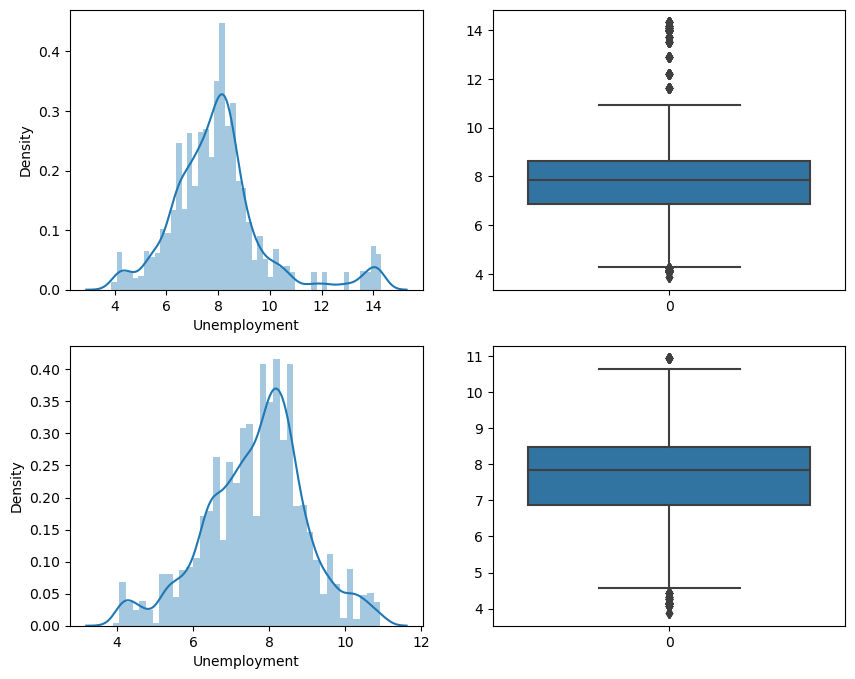

In [21]:
# Comparing

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(Sales['Unemployment'])

plt.subplot(2,2,2)
sns.boxplot(Sales['Unemployment'])

plt.subplot(2,2,3)
sns.distplot(Sales_new['Unemployment'])

plt.subplot(2,2,4)
sns.boxplot(Sales_new['Unemployment'])

plt.show()

In [22]:
Sales_new['Unemployment'].describe()

count    6057.000000
mean        7.659909
std         1.315488
min         3.879000
25%         6.866000
50%         7.827000
75%         8.476000
max        10.926000
Name: Unemployment, dtype: float64

# Capping

In [23]:
Sales_new_cap = Sales.copy()

Sales_new_cap['Unemployment'] = np.where(Sales_new_cap['Unemployment'] > upper_limit, upper_limit,
    np.where(Sales_new_cap['Unemployment'] < lower_limit, lower_limit, Sales_new_cap['Unemployment']))

In [24]:
Sales_new_cap

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


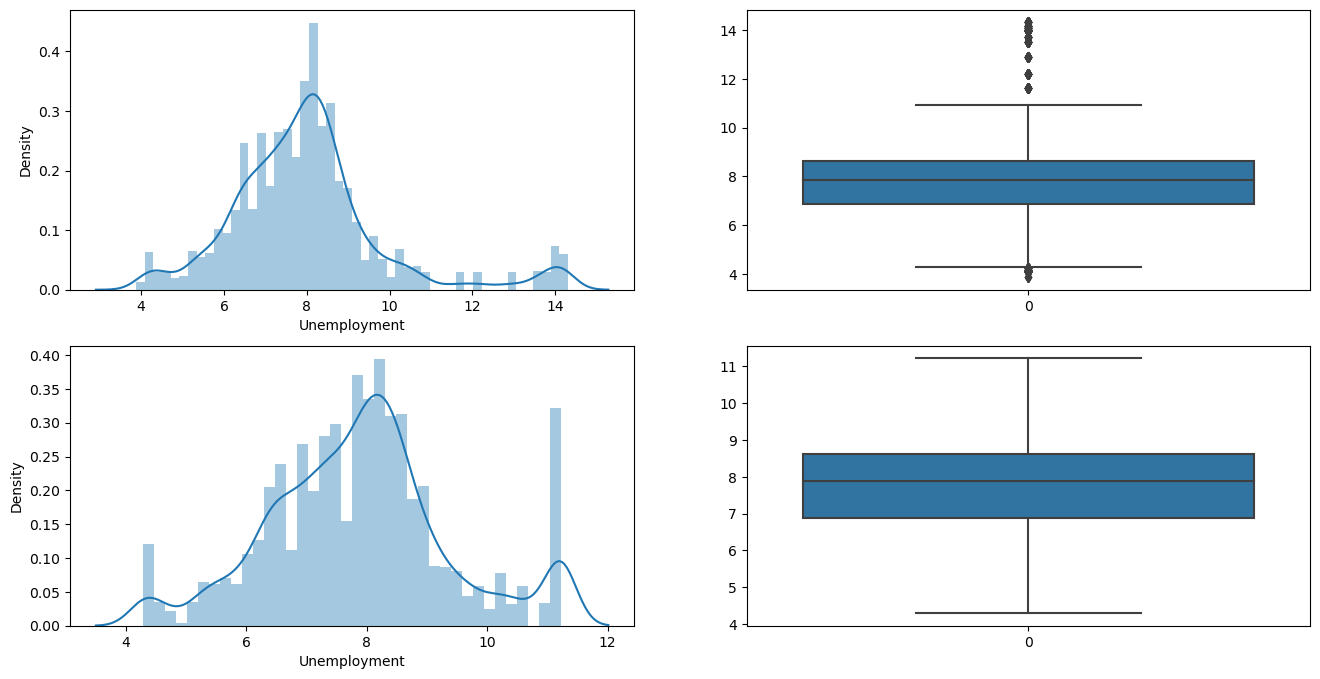

In [25]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(Sales['Unemployment'])

plt.subplot(2,2,2)
sns.boxplot(Sales['Unemployment'])

plt.subplot(2,2,3)
sns.distplot(Sales_new_cap['Unemployment'])

plt.subplot(2,2,4)
sns.boxplot(Sales_new_cap['Unemployment'])

plt.show()

In [26]:
Sales_new_cap['Unemployment'].describe()

count    6435.000000
mean        7.871208
std         1.520694
min         4.294500
25%         6.891000
50%         7.874000
75%         8.622000
max        11.218500
Name: Unemployment, dtype: float64

# Winsorization Technique

In [27]:
Upper_Limit = Sales['Unemployment'].quantile(0.95)
Upper_Limit

12.187

In [28]:
Lower_Limit = Sales['Unemployment'].quantile(0.05)
Lower_Limit

5.326

In [29]:
Sales_New_1 = Sales[(Sales['Unemployment'] <= Upper_Limit) & (Sales['Unemployment'] >= Lower_Limit)]

<Axes: xlabel='Unemployment', ylabel='Density'>

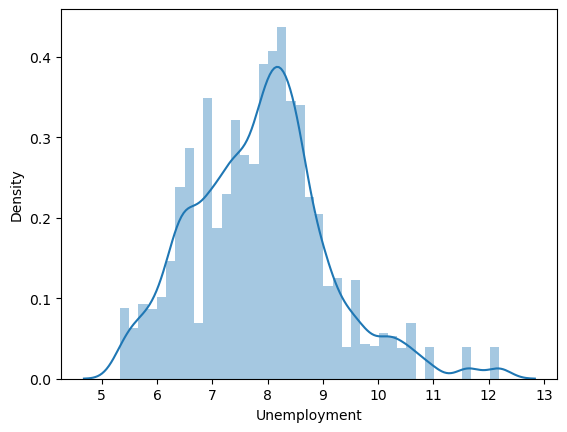

In [30]:
sns.distplot(Sales_New_1['Unemployment'])

In [31]:
Sales_New_1['Unemployment'].describe()

count    5836.000000
mean        7.872886
std         1.227513
min         5.326000
25%         6.989000
50%         7.874000
75%         8.523000
max        12.187000
Name: Unemployment, dtype: float64

In [32]:
Upper_Limit_1 = Sales_New_1['Weekly_Sales'].quantile(0.95)
Upper_Limit_1

2036252.9275

In [33]:
Lower_Limit_1 = Sales_New_1['Weekly_Sales'].quantile(0.05)
Lower_Limit_1

304941.06

In [34]:
Sales_New_2 = Sales_New_1[(Sales_New_1['Weekly_Sales'] <= Upper_Limit_1) & (Sales_New_1['Weekly_Sales'] >= Lower_Limit_1)]

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

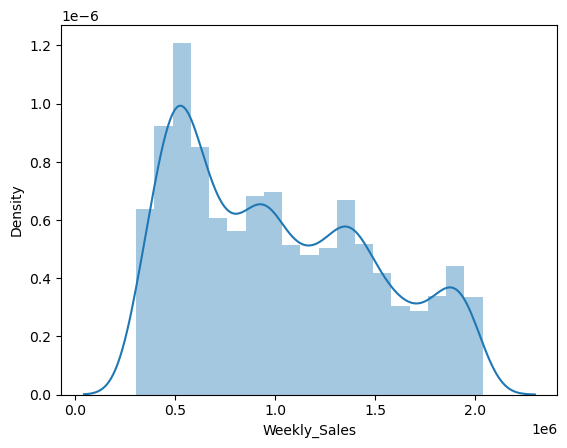

In [35]:
sns.distplot(Sales_New_2['Weekly_Sales'])

In [36]:
Sales_New_2['Unemployment'].describe()

count    5252.000000
mean        7.898620
std         1.244066
min         5.326000
25%         6.989000
50%         7.931000
75%         8.535000
max        12.187000
Name: Unemployment, dtype: float64

In [37]:
Sales_New_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5252 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5252 non-null   int64  
 1   Date          5252 non-null   object 
 2   Weekly_Sales  5252 non-null   float64
 3   Holiday_Flag  5252 non-null   int64  
 4   Temperature   5252 non-null   float64
 5   Fuel_Price    5252 non-null   float64
 6   CPI           5252 non-null   float64
 7   Unemployment  5252 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 369.3+ KB


In [38]:
Sales_New_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5836 non-null   int64  
 1   Date          5836 non-null   object 
 2   Weekly_Sales  5836 non-null   float64
 3   Holiday_Flag  5836 non-null   int64  
 4   Temperature   5836 non-null   float64
 5   Fuel_Price    5836 non-null   float64
 6   CPI           5836 non-null   float64
 7   Unemployment  5836 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 410.3+ KB


# Capping --> Winsorization

In [39]:
# Sales_new_2 = Sales.copy()

# Sales_new_2['Unemployment'] = np.where(Sales['Unemployment'] >= Upper_Limit,
#         Upper_Limit,
#         np.where(Sales['Unemployment'] <= Lower_Limit,
#         Lower_Limit,
# #         Sales['Unemployment']))

In [40]:
# Sales_new_2['Unemployment'].describe()

In [41]:
# sns.distplot(Sales_new_2['Unemployment'])

In [42]:
# sns.boxplot(Sales_new_2['Unemployment'])

In [43]:
Sales_New_2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Modeling

In [79]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)

X = Sales_New_2.drop(['Weekly_Sales', 'Date'], axis=1)

# Choose the response variable 'y' 

y = Sales_New_2['Weekly_Sales']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

# StandardScaler

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)


# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
scaler.mean_

array([2.27551687e+01, 6.63764962e-02, 6.10289010e+01, 3.34808107e+00,
       1.76492831e+02, 7.90735256e+00])

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [62]:
np.round(X_train_scaled.describe(), 1)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,3676.0,3676.0,3676.0,3676.0,3676.0,3676.0
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-0.3,-3.5,-1.9,-1.3,-2.1
25%,-0.9,-0.3,-0.7,-1.0,-1.1,-0.7
50%,-0.1,-0.3,0.1,0.2,0.4,0.0
75%,0.9,-0.3,0.8,0.8,1.0,0.5
max,1.7,3.8,1.9,2.4,1.3,3.4


In [64]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(3676, 6)
(1576, 6)
(3676,)
(1576,)


In [65]:
# Use the sklearn function 'LinearRegression' to fit on the training set
model = LinearRegression()
model.fit(X_train,y_train)

# Now predict on the test set
y_pred_test = model.predict(X_test)

In [66]:
# Get the coefficients
coefficients = model.coef_

# Get the intercept
intercept = model.intercept_

# Print the coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 1619356.8728300808
Coefficients: [-11364.37370533   8834.46680378   1166.53395853   -357.84762059
  -2399.56926495   1041.31901382]


In [67]:
### edTest(test_mse) ###
# Now compute the MSE with the predicted values and print it

mse = mean_squared_error(y_pred_test, y_test)
print(f'The test MSE is {mse}')

The test MSE is 206399701087.40967


In [68]:
import statsmodels.api as sm

In [69]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [70]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const           1.619357e+06
Store          -1.136437e+04
Holiday_Flag    8.834467e+03
Temperature     1.166534e+03
Fuel_Price     -3.578476e+02
CPI            -2.399569e+03
Unemployment    1.041319e+03
dtype: float64

In [71]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.49
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           7.55e-87
Time:                        22:18:49   Log-Likelihood:                -53121.
No. Observations:                3676   AIC:                         1.063e+05
Df Residuals:                    3669   BIC:                         1.063e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.619e+06   9.68e+04     16.733   

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 388607.6259229868
MSE: 206399701087.40967
RMSE: 454312.33869157644


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred_test)
print("r2 score:",r2*100,"%")

r2 score: 10.924130086767203 %


# K-Fold Cross Validation

In [74]:
#cross validation using lasso regression
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='r2')#cv=4 4fold cross validation
print(model)
print(f"Cross-Validation Scores: {cross_val_scores}")#we got 4 r2 values(use 4fold cross validation)
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")

LinearRegression()
Cross-Validation Scores: [0.10209413 0.0846494  0.11487284 0.09549286]
Mean Cross-Validation Score: 0.09927730516977559


In [75]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'positive_likelihood_ratio',
 'neg_negative_likelihood_ratio',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',

In [58]:
Find out VIF of each feature

SyntaxError: invalid syntax (4048598989.py, line 1)

In [4]:
def print3largest(arr):
    arr_size = len(arr)
    
    # There should be atleast three elements
    if arr_size < 3:
        print("Invalid Input")
        return
    
    third = first = second = float('-inf')
    
    for i in range(arr_size):
        # If current element is greater than first
        if arr[i] > first:
            third = second
            second = first
            first = arr[i]
        
        # If arr[i] is in between first and second then update second
        elif arr[i] > second and arr[i] != first:
            third = second
            second = arr[i]
        
        elif arr[i] > third and arr[i] != second and arr[i] != first:
            third = arr[i]

    print("Three largest elements are", first, second, third)

# Driver code
arr = [50, 61, 1, 10, 34, 11, 34]
print3largest(arr)

Three largest elements are 61 50 34


In [7]:
def print3largest(arr):
    arr_size = len(arr)
    arr = [50, 61, 1, 10, 34, 11, 34]

In [9]:
arr_size

NameError: name 'arr_size' is not defined

In [ ]:
Word 2 vec, node2vec - embadding , log liklehood, MSE 